<a href="https://colab.research.google.com/github/nekkantirohit/INFO5731/blob/main/In_class_exercise_05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct 10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [1]:
# Write your code here
#importing libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier

In [2]:
#reading csv file of train.txt
train_dafrme = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
#extracting text and sentiment colums from train csv files
train_dafrme[['Sentiment','Text']] = train_dafrme["Text"].str.split(" ", 1, expand=True)

train_dafrme.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,Text,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [3]:
#reading csv file of test.txt
test_dafrme = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
#extracting text and sentiment colums from test csv files
test_dafrme[['Sentiment','Text']] = test_dafrme["Text"].str.split(" ", 1, expand=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [ ]:
test_dafrme.head()

,Text,Sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [ ]:
# Clean data
#importing modules
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
w_n_l= WordNetLemmatizer()
#cleaning text
def clean_text(text_data):
  text_data="".join([word.lower() for word in text_data if word not in string.punctuation])
  text_data = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text_data)
  tokens = re.split('\W+',text_data)
  text_data = [w_n_l.lemmatize(word) for word in tokens if word not in stopword]
  return text_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Convert text and train data into numerical
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(analyzer = clean_text)
X_tf_idf = tf_idf_vect.fit_transform(train_dafrme['Text'])
print(X_tf_idf.shape)
X_tf_idf_dafrme=pd.DataFrame(X_tf_idf.toarray())
X_tf_idf_dafrme.columns=tf_idf_vect.get_feature_names()
X_test_tfidf = tf_idf_vect.transform(test_dafrme['Text'])
print(X_test_tfidf.shape)

(6920, 13343)
(1821, 13343)


In [ ]:
#methods
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()

#split the data
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf_dafrme, train_dafrme['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [ ]:
#(1) MultinominalNB
#importing accuracy_score and classification_report from sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
MNB_test = MNB.fit(x_train,y_train)
#prediction
y_MNB = MNB_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_MNB,y_test))
print(classification_report(y_test,y_MNB))
#importing cross_val_score from sklearn model selection
from sklearn.model_selection import cross_val_score
#accuracy
scores_MNB = cross_val_score(MNB, x_test, y_test, cv=10)
print("Accuracy using MNB",scores_MNB.mean())

Accuracy Score 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384

Accuracy using MNB 0.7247054530288813


In [ ]:
#(2) SVM
SVM_test = SVM.fit(x_train,y_train)
#prediction
y_SVM = SVM_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_SVM,y_test))
print(classification_report(y_test,y_SVM))
#importing cross_val_score from sklearn model selection
from sklearn.model_selection import cross_val_score
#accuracy
scores_SVM = cross_val_score(SVM, x_test, y_test, cv=10)
print("Accuracy using SVM",scores_SVM.mean())

Accuracy Score 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Accuracy using SVM 0.7348034615785632


In [ ]:
#(3) KNN
KNN_test = KNN.fit(x_train,y_train)
#prediction
y_KNN = KNN_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_KNN,y_test))
print(classification_report(y_test,y_KNN))
from sklearn.model_selection import cross_val_score
#accuracy
scores_KNN = cross_val_score(KNN, x_test, y_test, cv=10)
print("Accuracy using knn",scores_KNN.mean())

Accuracy Score 0.7398843930635838
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Accuracy using knn 0.6675737670732979


In [ ]:
#(4) Decision tree
dec_tree_test = DT.fit(x_train,y_train)
#prediction
y_dec_tree = dec_tree_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_dec_tree,y_test))
print(classification_report(y_test,y_dec_tree))
#accuracy
scores_DT = cross_val_score(DT, x_test, y_test, cv=10)
print("Accuracy using Decision trees",scores_DT.mean())

Accuracy Score 0.6560693641618497
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       671
           1       0.66      0.69      0.67       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384

Accuracy using Decision trees 0.6105307058700865


In [ ]:
#(5) Random Forest
RF_test = RF.fit(x_train,y_train)
#prediction
y_RF = RF_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_RF,y_test))
print(classification_report(y_test,y_RF))
#accuracy
scores_RF = cross_val_score(RF, x_test, y_test, cv=10)
print("Accuracy using Random Forest",scores_RF.mean())

Accuracy Score 0.7355491329479769
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       671
           1       0.71      0.82      0.76       713

    accuracy                           0.74      1384
   macro avg       0.74      0.73      0.73      1384
weighted avg       0.74      0.74      0.73      1384

Accuracy using Random Forest 0.6769627776040037


In [ ]:
#(6) XGBoost
XGB_test = XGB.fit(x_train,y_train)
#prediction
y_XGB = XGB_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_XGB,y_test))
print(classification_report(y_test,y_XGB))
#accuracy
scores_XGB = cross_val_score(XGB, x_test, y_test, cv=10)
print("Accuracy using XGBoost",scores_XGB.mean())

Accuracy Score 0.6445086705202312
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384

Accuracy using XGBoost 0.6184704410384736


In [ ]:
#printing mean scores of the methods
print("Accuracy using MNB",scores_MNB.mean())
print("Accuracy using SVM",scores_SVM.mean())
print("Accuracy using knn",scores_KNN.mean())
print("Accuracy using Decision trees",scores_DT.mean())
print("Accuracy using Random Forest",scores_RF.mean())
print("Accuracy using XGBoost",scores_XGB.mean())

Accuracy using MNB 0.7247054530288813
Accuracy using SVM 0.7348034615785632
Accuracy using knn 0.6675737670732979
Accuracy using Decision trees 0.6105307058700865
Accuracy using Random Forest 0.6769627776040037
Accuracy using XGBoost 0.6184704410384736


In [ ]:
#final score
predict_MNB = MNB_test.predict(X_test_tfidf)
print('Final trained model(MNB) with high accuracy evaluated based on the test data: %s' % accuracy_score(predict_MNB,test_dafrme['Sentiment']))

Final trained model(MNB) with high accuracy evaluated based on the test data: 0.7946183415705657


#(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering Please downlad the dataset by using the following link. https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones (You can also use different text data which you want)

#Apply the listed clustering methods to the dataset:

#K means, DBSCAN, Hierarchical clustering.

#You can refer to of the codes from the follwing link below. https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
#Write your code here.
# Code adapted from https://www.kaggle.com/karthik3890/text-clustering
import pandas as pd
sample_data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

In [ ]:
sample_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


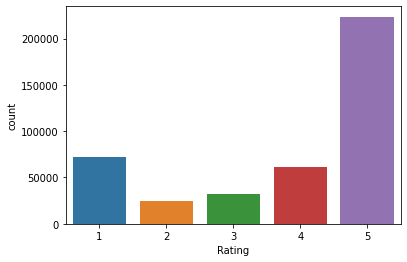

In [ ]:
#importing seaborn module
import seaborn as sns
#plotting graph
sns.countplot(sample_data.Rating)

In [ ]:
# transform star rating to positive/negative rating
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actual_Score = sample_data['Rating']
positiveNegative = actual_Score.map(partition) 
sample_data['RatingPosNeg'] = positiveNegative

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


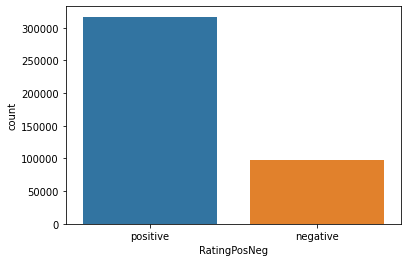

In [ ]:
# Graph positive and negative reviews
sns.countplot(sample_data.RatingPosNeg)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#initialising the snowball stemmer which is developed in recent years
sno = nltk.stem.SnowballStemmer('english') 
stop=set(stopwords.words('english'))

final = sample_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove punctuation
def cleanpunc(sent):
    cleaned_data = re.sub(r'[?|!|\'|"|#]',r'',sent)
    cleaned_data = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned_data)
    return  cleaned_data

In [ ]:
# Create sub-sample for testing to reduce processing time
#final = sample_data
final = sample_data.sample(n=10000, random_state=1)

In [ ]:
# Clean text
import re

i=0
str1=' '
final_string=[]
# store words from +ve reviews here
all_positive_words=[] 
# store words from -ve reviews here.
all_negative_words=[] 
s=''
for sent in final['Reviews'].values:
    filtered_sent=[]
    #print(sent);
    #sent=cleanhtml(sent) # remove HTMl tags
    try:
      for w in sent.split():
          for cleaned_words in cleanpunc(w).split():
              if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                  if(cleaned_words.lower() not in stop):
                      s=(sno.stem(cleaned_words.lower())).encode('utf8')
                      filtered_sent.append(s)
                      if (final['RatingPosNeg'].values)[i] == 'positive': 
                        #list of all words used to describe positive reviews
                          all_positive_words.append(s) 
                      if(final['RatingPosNeg'].values)[i] == 'negative':
                        #list of all words used to describe negative reviews reviews
                          all_negative_words.append(s) 
                  else:
                      continue
              else:
                  continue 
                   #final string of cleaned words
      str1 = b" ".join(filtered_sent)
      
      #print('str1:', str1)
      final_string.append(str1)
      i+=1
    except AttributeError as e:
      # No words to split
      final_string.append('')
      i+=1

In [ ]:
#adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedText']=final_string 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')

In [ ]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#bow = count_vect.fit_transform(final['CleanedText'].values)
bow = count_vect.fit_transform(final['CleanedText'].values)
print(bow.shape)

(10000, 8444)


In [ ]:
terms = count_vect.get_feature_names()

In [ ]:
# K-means clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [ ]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
# which tells us that clusters are far away from each other 
silhouette_score

0.2771729868538545

In [ ]:
# Assign cluster label to each input
dafrme = final
# the last column you can see the label numebers
dafrme['Bow Clus Label'] = model.labels_ 
dafrme.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0,positive,year cant realli complain gave teenag replac w...,3
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1,positive,perfect thank,1


In [ ]:
# How many points belong to each cluster -> using group by in pandas
dafrme.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0     141
1    7438
2      76
3    1932
4     395
5       6
6       8
7       1
8       2
9       1
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 use
 screen
 get
 like
 batteri
 app
 good
 camera
 work
Cluster 1: phone
 work
 good
 great
 love
 use
 product
 excel
 like
 one
Cluster 2: phone
 use
 like
 screen
 get
 one
 work
 app
 good
 great
Cluster 3: phone
 work
 use
 great
 good
 one
 get
 like
 screen
 would
Cluster 4: phone
 use
 work
 one
 get
 like
 would
 batteri
 screen
 good
Cluster 5: phone
 use
 would
 work
 one
 like
 seller
 month
 get
 buy
Cluster 6: phone
 use
 app
 screen
 android
 one
 good
 get
 camera
 like
Cluster 7: phone
 dont
 like
 use
 qualiti
 good
 key
 time
 want
 list
Cluster 8: use
 app
 favorit
 screen
 phone
 display
 one
 great
 recent
 back
Cluster 9: appl
 iphon
 android
 phone
 samsung
 year
 even
 version
 compani
 know


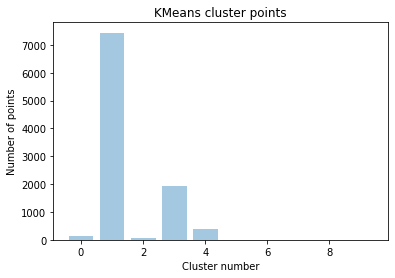

In [ ]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], dafrme.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values)
tf_idf.shape

(10000, 8444)

In [ ]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tf_idf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [ ]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[4.18213625e-04, 1.40162898e-05, 6.73526816e-05, ...,
        1.50632050e-04, 1.50632050e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# to understand what kind of words generated as columns by BOW
terms1 = tf_idf_vect.get_feature_names()
terms1[1:10]

['aac',
 'aand',
 'ab',
 'abandon',
 'abc',
 'abd',
 'abeautifulit',
 'abierto',
 'abil']

In [ ]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tf_idf, labels_tf, metric='euclidean')
silhouette_score_tf

0.06624577871861036

In [ ]:
# Giving Labels/assigning a cluster to each point/text 
dafrme1 = dafrme
dafrme1['Tfidf Clus Label'] = model_tf.labels_
dafrme1.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0,positive,year cant realli complain gave teenag replac w...,3,1
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1,positive,perfect thank,1,5
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1,negative,back camera stop work phone touch screen stop ...,3,1
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0,positive,good,1,3
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0,positive,complaint work fine still work perfect tear we...,1,0


In [ ]:
# How many points belong to each cluster ->
dafrme1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0    3813
1    3424
2     321
3     401
4     602
5     263
6     375
7     460
8     172
9     169
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: work
 good
 product
 thank
 like
 expect
 great
 well
 time
 use
Cluster 1: phone
 use
 great
 work
 one
 good
 batteri
 like
 screen
 get
Cluster 2: love
 phone
 great
 new
 good
 daughter
 son
 thank
 iphon
 absolut
Cluster 3: good
 phone
 product
 price
 condit
 far
 work
 thank
 qualiti
 realli
Cluster 4: sim
 unlock
 card
 phone
 work
 use
 great
 new
 get
 one
Cluster 5: perfect
 work
 condit
 phone
 product
 everyth
 love
 great
 thank
 excel
Cluster 6: excel
 product
 phone
 recommend
 thank
 love
 good
 seller
 price
 purchas
Cluster 7: great
 phone
 work
 price
 product
 buy
 condit
 good
 deal
 thank
Cluster 8: excelent
 producto
 telefono
 celular
 recomendado
 telfono
 súper
 punto
 recomienda
 tlf
Cluster 9: nice
 phone
 good
 work
 product
 love
 fast
 look
 price
 seller


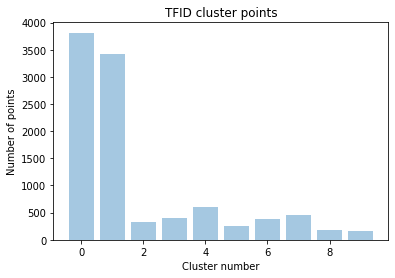

In [ ]:
# visually how points or reviews are distributed across 10 clusters 

plt.bar([x for x in range(10)], dafrme1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('TFID cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

#**Average Word to Vector**

In [ ]:
# Prepare sentence vectors for DBSCAN and Hierarchal Clustering
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [ ]:
i=0
list_of_sent_train=[]
for sent in final['CleanedText'].values:
    filtered_sentence=[]
    #sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)
print(list_of_sent_train)

[['year', 'cant', 'realli', 'complain', 'gave', 'teenag', 'replac', 'wait', 'upgrad', 'time', 'phone', 'use', 'crap', 'batteri', 'final', 'isnt', 'keep', 'anymor', 'wont', 'stay', 'charg', 'though', 'cant', 'realli', 'complain', 'phone', 'earpiec', 'doubl', 'extern', 'speaker', 'want', 'play', 'song', 'loud', 'wasnt', 'best', 'doabl'], ['perfect', 'thank'], ['back', 'camera', 'stop', 'work', 'phone', 'touch', 'screen', 'stop', 'work', 'restart', 'phone', 'get', 'work', 'phone', 'huge', 'disappoint', 'worth', 'paid'], ['good'], ['complaint', 'work', 'fine', 'still', 'work', 'perfect', 'tear', 'wear', 'sign', 'refurbish', 'phone'], ['hello', 'name', 'emildr', 'tower', 'buy', 'phone', 'provid', 'one', 'get', 'bad', 'light', 'due', 'situcion', 'pass', 'countri', 'make', 'refund', 'howev', 'notifi', 'happen', 'greet'], ['disappoint', 'bought', 'phone', 'mom', 'one', 'hard', 'hear', 'phone', 'ring', 'extrem', 'faint', 'ring', 'volum', 'cannot', 'increas', 'guess', 'get', 'pay'], ['perfect'],

In [ ]:
import gensim
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [ ]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(10000, 100)

#**K Means CLustering for Avg word to vectors**

In [ ]:
# Kmeans
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

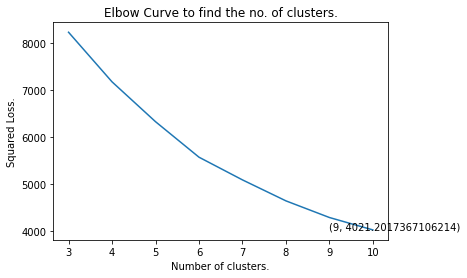

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  4021.2017367106214


In [ ]:
# Choosing the best cluster using Elbow Method.
# source credit,few parts of min squred loss info is taken from different parts of the stakoverflow answers.
# this is used to understand to find the optimal clusters in differen way rather than used in BOW, TFIDF
squared_errors = []
for cluster in num_clus:
  # Train Cluster
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) 
    # Appending the squared loss obtained in the list
    squared_errors.append(kmeans.inertia_) 
# As argmin return the index of minimum loss.    
optimal_clusters = np.argmin(squared_errors) + 2  
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [ ]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[-0.21571778,  0.12111545, -0.24588969,  0.26539271, -0.11590834,
        -0.03730707, -0.24944766,  0.69330696,  0.45399909,  0.20367016,
        -0.48578731, -0.18406322, -0.27453009,  0.04547137,  0.22258345,
        -0.91744543, -0.36294247,  0.26152057, -0.15414336, -0.41419387,
        -0.68083359,  0.85368692, -0.77985368, -0.50824928, -0.51276039,
        -0.04028047, -0.39661431, -0.37618416,  0.46841612, -0.34390597,
        -0.177095  , -0.4824502 , -0.05178307,  0.08904134,  0.32437907,
        -0.04079815, -0.24319077, -0.30595082, -0.11850438, -0.63324105,
        -0.4863737 ,  0.09415006,  0.15266109, -0.18796021,  0.62658445,
        -0.68079334,  0.36097727, -0.3477461 ,  0.20036836,  0.32038882,
        -0.20600913,  0.46180244, -0.03160383,  0.22189673, -0.53878664,
         0.09949268, -0.22220052,  0.18832523, -0.04412448,  0.29853093,
         0.1948242 ,  0.47186715, -0.15706437, -0.49865869,  0.08227019,
         0.42832803, -0.69370711, -0.39566034, -0.6

In [ ]:
# Giving Labels and assigning a cluster to each text 
dafrmea = dafrme1
dafrmea['AVG-W2V Clus Label'] = model2.labels_
dafrmea.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0,positive,year cant realli complain gave teenag replac w...,3,1,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1,positive,perfect thank,1,5,3


#**DBSCAN Clustering**

In [ ]:
from sklearn.cluster import DBSCAN
# Computing 200th Nearest neighbour distance
min_Pts = 2 * 100
# The function returns the no in the array which is  greater than or equal to itself.
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    # Binary searching.
    while l <= r: 
        mid_term = int(l + (r - l) / 2)
        if nums[mid_term] >= target:
            r = mid_term - 1
        else:
            l = mid_term + 1
    return l
 # Returns the dist of 200th nearest neighbour.
def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
      # computing distances.
        dist = np.sum((x - val) **2 ) 
        # If dist is more than current largest distance found.
        if(len(dists) == 200 and dists[199] > dist): 
          # Using the lower bound function to get the right position.
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

In [ ]:
# Computing the 200th nearest neighbour distance of some point in the dataset:
two_hundreth_neigh = []
#calculating the 200th nearest neighbour distance
for val in sent_vectors[:1500]:
    two_hundreth_neigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
#sort
two_hundreth_neigh.sort()

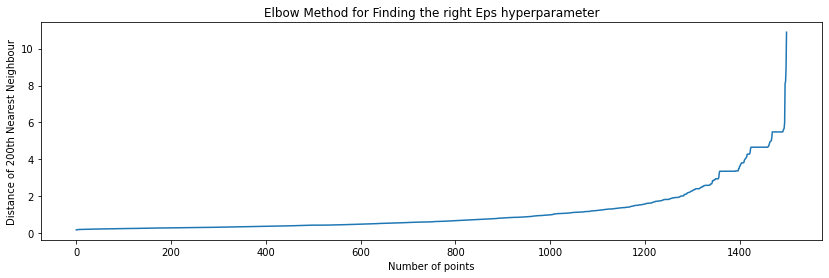

In [ ]:
# Plotting graph for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(two_hundreth_neigh))], two_hundreth_neigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
# Training DBSCAN :
model_DB = DBSCAN(eps = 5, min_samples = min_Pts, n_jobs=-1)
model_DB.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [ ]:
#taking the first two values AVG-W2V Clus Label
dafrme_db = dafrmea
dafrme_db['AVG-W2V Clus Label'] = model_DB.labels_
dafrme_db.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0,positive,year cant realli complain gave teenag replac w...,3,1,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1,positive,perfect thank,1,5,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


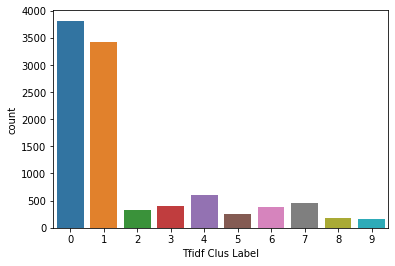

In [ ]:
#importing seaborn module
import seaborn as sns
sns.countplot(dafrme_db['Tfidf Clus Label'])

In [ ]:
# How many points belong to each cluster using groupby ->
dafrmea.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    10000
Name: Reviews, dtype: int64

#**Clustering Hierarchical**

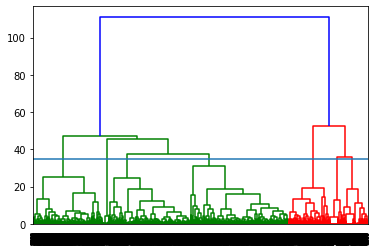

In [ ]:
#importing scipy module
import scipy
from scipy.cluster import hierarchy
#creating dendogram using hierachy module
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
#plotting graph
# cut at 30 to get 5 clusters
plt.axhline(y=35)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
# Giving Labels/assigning a cluster to each point/text 
agg_dafrme_a = dafrme_db
agg_dafrme_a['AVG-W2V Clus Label'] = cluster.labels_
agg_dafrme_a.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0,positive,year cant realli complain gave teenag replac w...,3,1,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1,positive,perfect thank,1,5,2


In [ ]:
# How many points belong to each cluster ->
agg_dafrme_a.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    5361
1    1133
2    1231
3    2078
4     197
Name: Reviews, dtype: int64

#In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)

#**Kmeans:** Kmeans clustering method is attained primarily by grouping the data based on the similarity and then the data points of k number are randomly assingned which shows the centroids of each group and the remaining the data points which are left out are mapped to the next nearest centroid and this process is replicated inside each of these groups until the  data in the centriod changes and each of the data points are stored in same group. 

#**DBSCAN:** DBSCAN (Density-based spatial clustering of applications with noise) is a density based clustering algorithm in this data points are grouped based on their similarity in data and areas which have higher data density are stored as a same group while areas with lower density are stored in form of noise which helps in seperating the data which are identical in nature.

#**Hierachical clustering:** Hierachial method is attained by grouping each document or a data point with most similar data points in a repetative method, in each of these data point combinations it shows a node which is in form of  an hierachial tree and resulting nodes are combined together with most identical nodes.